In [1]:
#pip install pandas

In [2]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
timeframe = "1D"

start_date = pd.Timestamp("2015-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

tickers = ["PYPL","SQ","V"]

In [6]:
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

df_ticker.head()

PYPL                                   SQ          \
                            open   high    low   close   volume  open    high   
time                                                                            
2016-05-12 00:00:00-04:00  39.85  40.00  39.17  39.510  5557552  9.78  9.8200   
2016-05-13 00:00:00-04:00  39.54  39.80  39.31  39.480  4815644  9.28  9.6847   
2016-05-16 00:00:00-04:00  39.36  39.53  39.13  39.290  8957334  9.30  9.5600   
2016-05-17 00:00:00-04:00  39.10  39.66  38.75  39.065  9428211  8.98  9.5627   
2016-05-18 00:00:00-04:00  39.18  39.36  38.50  38.980  9425561  9.11  9.9900   

                                                     V                        \
                            low close    volume   open    high    low  close   
time                                                                           
2016-05-12 00:00:00-04:00  9.20  9.30   2458283  77.80  78.190  77.07  77.92   
2016-05-13 00:00:00-04:00  9.28  9.35   1864452  77.71  78.280  76.84  76.85   
2016-05-16 00:00:00-04:00  8.91  9.17   5330245  77.02  78.055  77.00  77.73   
2016-05-17 00:00:00-04:00  8.63  9.18  12217676  77.57  77.920  76.52  76.76   
2016-05-18 00:00:00-04:00  9.11  9.40   4903036  76.71  77.880  76.40  77.41   

                                    
                            volume  
time                                
2016-05-12 00:00:00-04:00  6657039  
2016-05-13 00:00:00-04:00  5882318  
2016-05-16 00:00:00-04:00  6199499  
2016-05-17 00:00:00-04:00  5654560  
2016-05-18 00:00:00-04:00  5242013

In [7]:
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

MC_even_dist.portfolio_data.head()

PYPL                                              \
                            open   high    low   close   volume daily_return   
time                                                                           
2016-05-12 00:00:00-04:00  39.85  40.00  39.17  39.510  5557552          NaN   
2016-05-13 00:00:00-04:00  39.54  39.80  39.31  39.480  4815644    -0.000759   
2016-05-16 00:00:00-04:00  39.36  39.53  39.13  39.290  8957334    -0.004813   
2016-05-17 00:00:00-04:00  39.10  39.66  38.75  39.065  9428211    -0.005727   
2016-05-18 00:00:00-04:00  39.18  39.36  38.50  38.980  9425561    -0.002176   

                             SQ                                             \
                           open    high   low close    volume daily_return   
time                                                                         
2016-05-12 00:00:00-04:00  9.78  9.8200  9.20  9.30   2458283          NaN   
2016-05-13 00:00:00-04:00  9.28  9.6847  9.28  9.35   1864452     0.005376   
2016-05-16 00:00:00-04:00  9.30  9.5600  8.91  9.17   5330245    -0.019251   
2016-05-17 00:00:00-04:00  8.98  9.5627  8.63  9.18  12217676     0.001091   
2016-05-18 00:00:00-04:00  9.11  9.9900  9.11  9.40   4903036     0.023965   

                               V                                              
                            open    high    low  close   volume daily_return  
time                                                                          
2016-05-12 00:00:00-04:00  77.80  78.190  77.07  77.92  6657039          NaN  
2016-05-13 00:00:00-04:00  77.71  78.280  76.84  76.85  5882318    -0.013732  
2016-05-16 00:00:00-04:00  77.02  78.055  77.00  77.73  6199499     0.011451  
2016-05-17 00:00:00-04:00  77.57  77.920  76.52  76.76  5654560    -0.012479  
2016-05-18 00:00:00-04:00  76.71  77.880  76.40  77.41  5242013     0.008468

In [8]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000456,1.012029,0.993764,1.011855,1.014831,0.989102,1.021166,0.996426,0.986414,0.994813,...,0.979258,0.985564,0.987777,1.022064,1.004782,0.983860,1.006162,1.007927,0.989742,1.023579
2,1.000145,1.003140,1.020858,1.021458,1.013170,1.007645,1.007028,0.996223,1.000559,1.018782,...,0.982725,0.978660,0.988895,1.012390,0.987863,1.006437,0.999449,1.030119,0.990407,1.026394
3,1.003024,0.986586,1.030213,1.012136,1.015808,0.990241,1.010248,0.988575,0.985178,1.012133,...,0.982468,0.969180,0.999334,1.018579,0.992051,0.999799,1.010202,1.041562,0.993456,1.044690
4,0.977075,1.012301,1.017515,1.016281,1.015277,1.024568,0.998767,1.004137,0.967856,1.022838,...,0.967700,0.968595,0.997612,1.021554,1.011210,1.031305,1.017373,1.032374,0.988480,1.033438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,14.212408,5.952324,3.013823,3.295978,2.912489,7.721484,7.920387,3.671579,5.941268,5.298266,...,4.967282,23.639879,7.152933,13.610850,13.129837,14.625808,18.680538,6.070804,3.979790,13.425407
1257,14.463013,6.058570,2.993131,3.317708,2.921570,7.779447,7.933293,3.766146,5.865557,5.360230,...,4.941496,23.554638,7.173081,13.579831,12.973521,14.509256,18.540455,6.250797,4.025873,13.127487
1258,14.635617,6.134947,3.044497,3.294538,2.916845,7.831105,7.877075,3.847142,5.889395,5.409172,...,4.834859,24.096839,7.130955,13.431482,13.181898,14.386638,18.772664,6.338137,4.083350,12.966869
1259,14.494891,6.211531,3.059645,3.281330,2.935842,7.830470,8.153725,3.894221,6.001144,5.302778,...,4.842542,24.338318,7.170583,13.330742,13.310390,14.282511,18.548889,6.172465,4.086949,12.745848


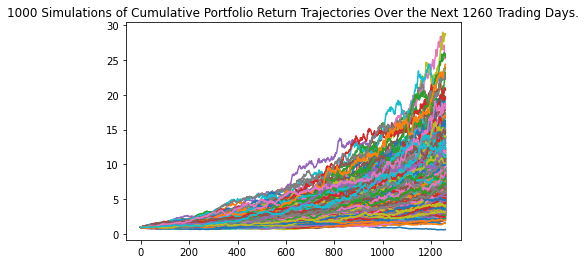

In [9]:
#Simulated projections of 1000 different scenarios over the next 5 years

line_plot = MC_even_dist.plot_simulation()

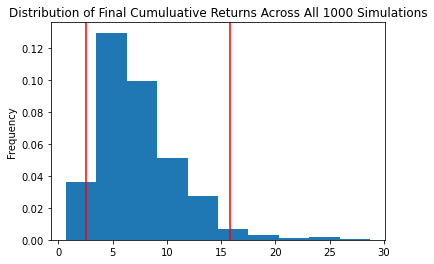

In [10]:
dist_plot = MC_even_dist.plot_distribution()

In [11]:
even_tbl = MC_even_dist.summarize_cumulative_return()
print(even_tbl)

count           1000.000000
mean               7.372056
std                3.707033
min                0.688482
25%                4.740818
50%                6.692802
75%                9.129001
max               28.743174
95% CI Lower       2.577380
95% CI Upper      15.789315
Name: 1260, dtype: float64


In [12]:
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $38660.71 and $236839.72.
